# Interactive Configurator
Copyright (c) 2022 Siemens AG Oesterreich
SPDX-License-Identifier: MIT


In [1]:
%cd ..
from ooasp.interactive import InteractiveConfigurator
from ooasp.kb import OOASPKnowledgeBase
racks_kb = OOASPKnowledgeBase.from_file("racks_v1","./examples/racks/kb.lp")

/Users/susana/Documents/Education/PhD/ExternalProjects/OOASP/asp_interactive_configuration


------
## Basic interaction
------

### Start

In [2]:
iconf = InteractiveConfigurator(racks_kb,"racks_config_1",["./examples/racks/constraints.lp"])

### Visualize

In [3]:
iconf.show_history()

0. start


##### Knowledge Base

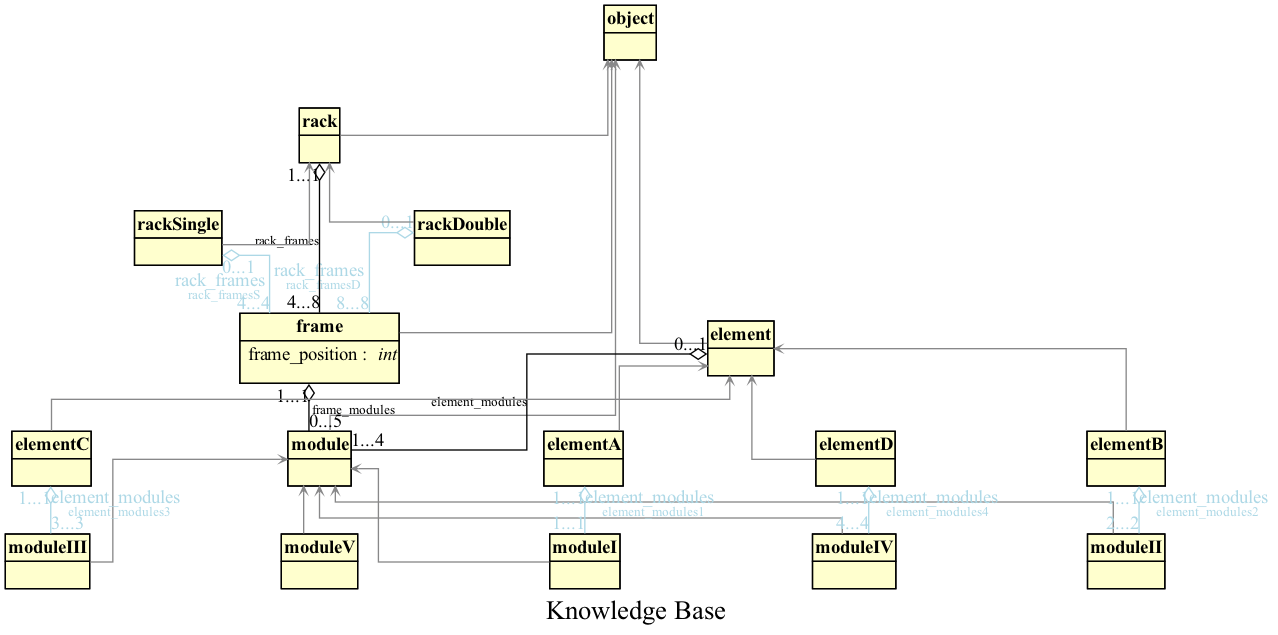

In [4]:
iconf.view_kb()

##### Current partial configuration

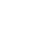

In [5]:
iconf.view()

##### State of the interaactive configurator

In [6]:
print(iconf)

==========INTERACTIVE CONFIG==========
{
    "kb": "racks_v1",
    "config": "racks_config_1",
    "browsing": false,
    "found configuration ": true
}
----------Current State----------
{
    "last action": "start",
    "number of objects": 0,
    "config": ""
}



### Check

In [7]:
iconf.check()
iconf.config.show_cv()

All checks passed!


------
## Extending the domain
------

### Extend the domain and propagate associations
This extends the domain with a rackSingle and all the elements required by the association
Notice that all objects are not required in the configuration.

In [8]:
iconf.extend_domain(1,'rackSingle')

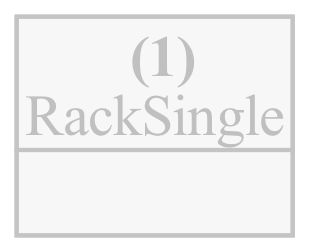

In [9]:
iconf.view()

In [10]:
iconf.check()

True

In [11]:
iconf.config.show_cv()

All checks passed!


Include obejct 1 in the configuration

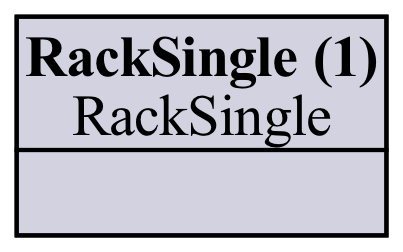

In [12]:
iconf.select_object_class(1,'rackSingle')
iconf.view()

### Extend the domain
Only creates one Rack without required objects

In [15]:
iconf = InteractiveConfigurator(racks_kb,"racks_config_1",["./examples/racks/constraints.lp"])

In [16]:
iconf.extend_domain(1,'rack')

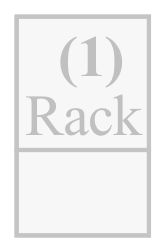

In [17]:
iconf.view()

### Add a leaf

In [18]:
iconf.new_object('frame')

2

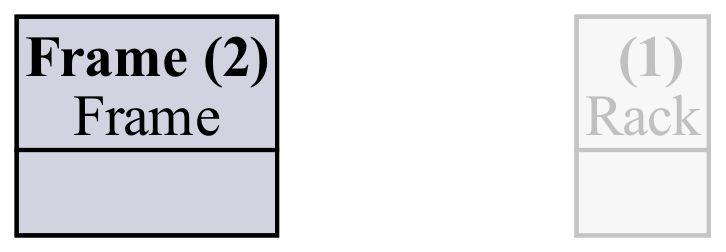

In [19]:
iconf.view()

In [20]:
iconf.show_options()


----------Options for object 1----------

remove_object_class(1)
select_object_class(1, 'rackSingle')
select_object_class(1, 'rackDouble')
select_association('rack_frames', 1, 2)
select_association('rack_framesS', 1, 2)
select_association('rack_framesD', 1, 2)
----------Options for object 2----------

remove_object_class(2)
select_object_class(2, 'frame')
select_value(2, 'frame_position', 1)
select_value(2, 'frame_position', 2)
select_value(2, 'frame_position', 3)
select_value(2, 'frame_position', 4)
select_value(2, 'frame_position', 5)
select_value(2, 'frame_position', 6)
select_value(2, 'frame_position', 7)
select_value(2, 'frame_position', 8)
select_association('rack_frames', 1, 2)
select_association('rack_framesS', 1, 2)
select_association('rack_framesD', 1, 2)


------
## Searching for solutions
------

### Browse solutions

In [21]:
print(iconf.next_solution())

None


### Extend incrementally

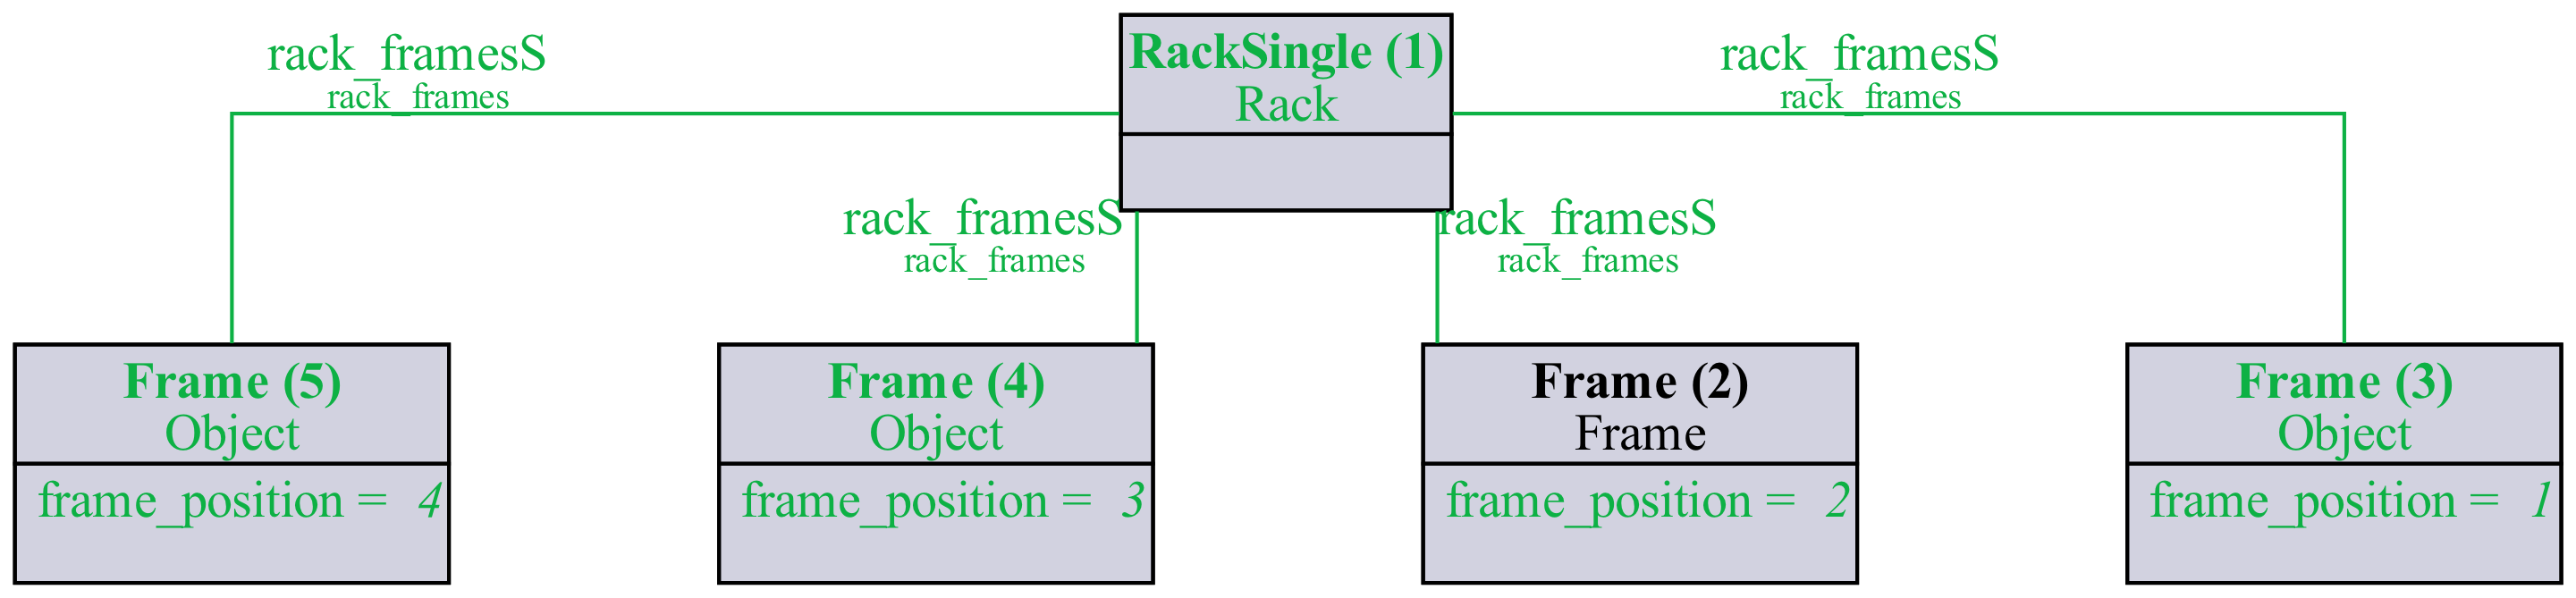

In [22]:
iconf.extend_incrementally()
iconf.view_found()

### Select found configuration

In [23]:
iconf.select_found_configuration()

### Show options for current configuration

In [24]:
# TODO: fix this
iconf.show_options()


----------Options for object 1----------

remove_object_class(1)
select_object_class(1, 'rackSingle')
remove_association('rack_frames', 1, 2)
remove_association('rack_framesS', 1, 2)
remove_association('rack_frames', 1, 3)
remove_association('rack_framesS', 1, 3)
remove_association('rack_frames', 1, 4)
remove_association('rack_framesS', 1, 4)
remove_association('rack_frames', 1, 5)
remove_association('rack_framesS', 1, 5)
----------Options for object 2----------

remove_object_class(2)
select_object_class(2, 'frame')
remove_value(2, 'frame_position')
remove_association('rack_frames', 1, 2)
remove_association('rack_framesS', 1, 2)
----------Options for object 3----------

remove_object_class(3)
select_object_class(3, 'frame')
remove_value(3, 'frame_position')
remove_association('rack_frames', 1, 3)
remove_association('rack_framesS', 1, 3)
----------Options for object 4----------

remove_object_class(4)
select_object_class(4, 'frame')
remove_value(4, 'frame_position')
remove_association

------
## Modifing current (partial) configuration
------

In [25]:
iconf = InteractiveConfigurator(racks_kb,"racks_config_1",["./examples/racks/constraints.lp"])
iconf.extend_domain(2)

In [26]:
iconf.get_options()
iconf.show_options()


----------Options for object 1----------

remove_object_class(1)
select_object_class(1, 'frame')
select_object_class(1, 'moduleI')
select_object_class(1, 'moduleII')
select_object_class(1, 'moduleIII')
select_object_class(1, 'moduleIV')
select_object_class(1, 'moduleV')
select_object_class(1, 'elementA')
select_object_class(1, 'elementB')
select_object_class(1, 'elementC')
select_object_class(1, 'elementD')
select_object_class(1, 'rackSingle')
select_object_class(1, 'rackDouble')
select_value(1, 'frame_position', 1)
select_value(1, 'frame_position', 2)
select_value(1, 'frame_position', 3)
select_value(1, 'frame_position', 4)
select_value(1, 'frame_position', 5)
select_value(1, 'frame_position', 6)
select_value(1, 'frame_position', 7)
select_value(1, 'frame_position', 8)
select_association('rack_frames', 2, 1)
select_association('rack_framesS', 2, 1)
select_association('rack_framesD', 2, 1)
select_association('frame_modules', 1, 2)
select_association('element_modules', 1, 2)
select_ass

### Select leaf class

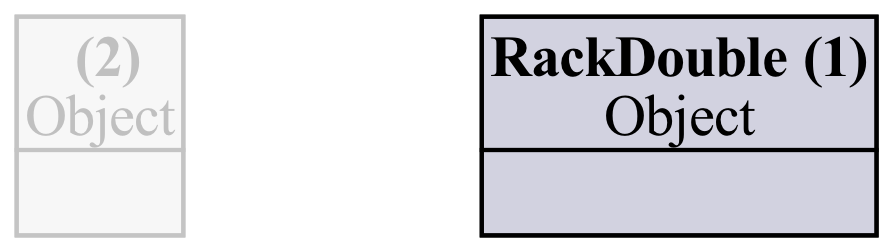

In [27]:
iconf.select_object_class(1,'rackDouble')
iconf.view()

### Select a value

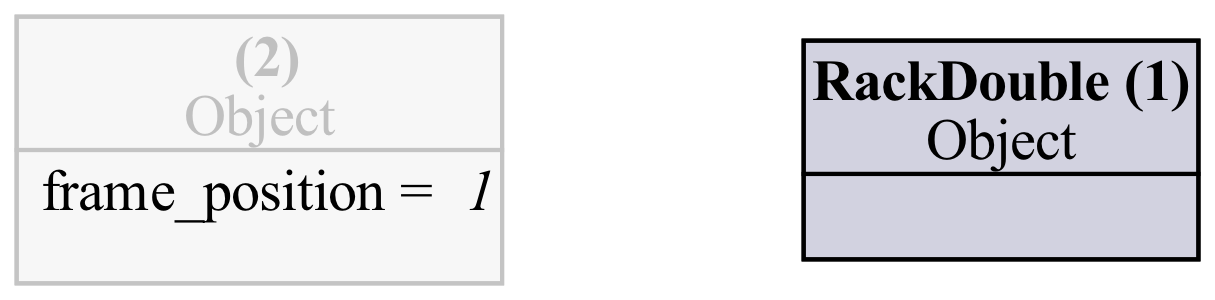

In [28]:
iconf.select_value(2,'frame_position',1)
iconf.view()

### Select Association

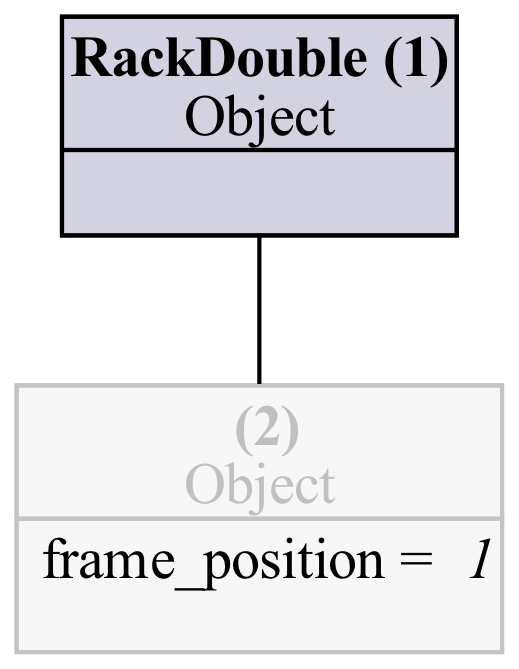

In [29]:
iconf.select_association('rack_frames',1,2)
iconf.view()

### Remove leaf class

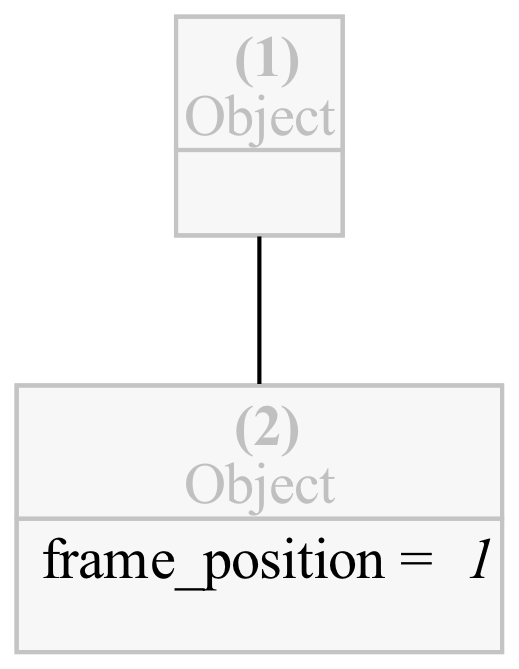

In [30]:
iconf.remove_object_class(1)
iconf.view()

### Remove value

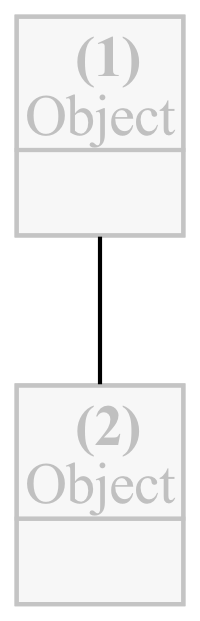

In [31]:
iconf.remove_value(2,'frame_position')
iconf.view()

### Remove association

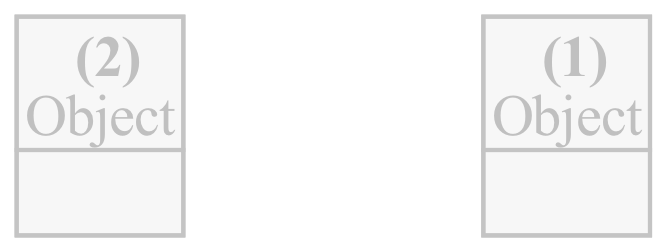

In [32]:
iconf.remove_association('rack_frames',1,2)
iconf.view()

# Help

In [33]:
help(iconf)

Help on InteractiveConfigurator in module ooasp.interactive object:

class InteractiveConfigurator(builtins.object)
 |  InteractiveConfigurator(kb: ooasp.kb.OOASPKnowledgeBase, config_name: str, additional_files: List = None, additional_prg: str = '')
 |  
 |  Handles the interactive process of a configuration
 |      Properties:
 |          kb (OOASPKnowledgeBase): The Knowledge base
 |          config_name (str): The name of the configuration
 |          states (List[State]): The list of all states
 |          additional_files (List[str]): The list of additional lp files
 |          found_config (OOASPConfig):  The complete configuration found in the browsing
 |          brave_config (OOASPConfig):  The brave configuration found with all the options
 |          cautious_config (OOASPConfig):  The cautious configuration found with all the inferences
 |          last_size_grounded (int): The last size that was grounded
 |  
 |  Methods defined here:
 |  
 |  __init__(self, kb: ooasp.kb